## Decision Tree 
- look like tree
- root
- branches
- leafs
- 2 types
    1. Decision tree classification(categorical)
        - Entropy 
        - gini
        
    2. Decision tree Regressor (continuous data)
        - Mse-Mean squred error-variance reduction
        - Mae-Mean absolute error
        - fridman-mse
    
     

## Decision Tree Algorithems
    1. id3- iterative dechotomiser algorithem
    2. CART- Classification and Regression

In [1]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\NAGARAJU\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
df.shape

(59, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [10]:
x=df[["fruit_label","mass","width","height"]]
x.head()

,fruit_label,mass,width,height
0,1,192,8.4,7.3
1,1,180,8.0,6.8
2,1,176,7.4,7.2
3,2,86,6.2,4.7
4,2,84,6.0,4.6


In [11]:
y=df["color_score"]
y.head()

0    0.55
1    0.59
2    0.60
3    0.80
4    0.79
Name: color_score, dtype: float64

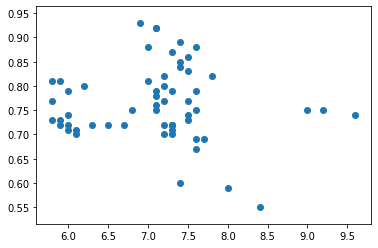

In [12]:
## visualise
x1=df["width"]
y1=df["color_score"]
plt.scatter(x1,y1)

In [36]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=3,splitter='random')

In [37]:
model.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [38]:
pred=model.predict(x)
#pred

In [39]:
model.predict([[1,180,8.0,6.8]])

array([0.65333333])

In [40]:
from sklearn.metrics import r2_score

In [41]:
model.score(x,y)*100

29.681021924269167

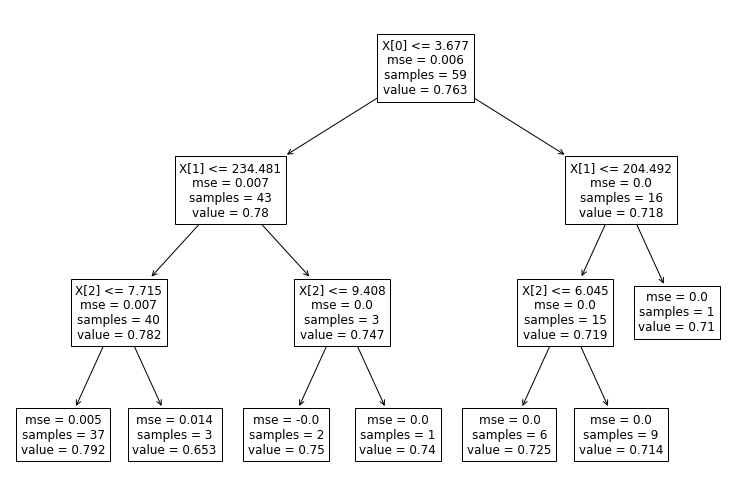

In [42]:
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(model)
plt.show()

## Limitations
- when we get tree as until it's maximum depth 
- High variance- get error
- causes to overfitting

## Random Forest Classifier
- ensemble model
- Developed by Tinkamho
- combination of Decision trees
- high varaince can converted into Low variance when you have multiple decision tree's
- depends up on majority voting from decidion trees

In [44]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [46]:
birds_df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/bird%20data.csv")
birds_df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [47]:
birds_df.shape

(420, 12)

In [48]:
birds_df.isnull().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [49]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


In [50]:
birds_df["type"].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [51]:
import numpy as np
birds_df=birds_df.replace(np.nan,0.1)
birds_df

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


In [52]:
birds_df.isnull().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [54]:
a=birds_df.drop('type',axis="columns")
a

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13
...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24


In [59]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
birds_df["type"]=lb.fit_transform(birds_df["type"])
b=birds_df["type"]
b.head()

0    3
1    3
2    3
3    3
4    3
Name: type, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,train_size=0.7,random_state=40)


In [81]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=50,criterion='entropy')

In [82]:
r.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_pred=r.predict(x_test)


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)*100

94.44444444444444

In [85]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  3,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0],
       [ 0,  2,  0,  0,  5,  1],
       [ 0,  0,  0,  0,  1, 24]], dtype=int64)

In [86]:
birds_df["type"].unique()

array([3, 5, 4, 1, 0, 2], dtype=int64)

In [ ]:
##  Try to apply Decision tree regression to the auto mobiles dataset in kaggle
 # mpg
